author: ilian

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Part I

1. Create a matrix of random values of a distribution of your choice.

In [2]:
np.asmatrix(np.random.random((2,2)) * 10)

matrix([[9.90115036, 0.1686291 ],
        [4.0957755 , 2.46557984]])

2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [3]:
np.array(range(12)).reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

3. Write a function that creates an incremental array of dimension (1,n) with values
between 0 and 1. Use arr.shape to verify

In [4]:
def create_arr(n):
    return np.random.random((1,n))

In [5]:
test = create_arr(3)
print(test)
print(test.shape)

[[0.53476363 0.47637967 0.8497608 ]]
(1, 3)


4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [6]:
arr = np.array(np.random.random((10, 12))*100)
print(arr)
arr[:4, 8:]

[[71.88730089 41.37487648 33.23486449 63.67095968 19.58572577 83.97081936
   2.64134025 95.5533555   4.67144744 16.39175359  9.76306534 51.31885023]
 [80.78700841 83.33182489 26.16768722 11.83090675 69.16122228 86.95230704
  97.24340868 52.25510209 31.57534901 28.14080849 35.58369344 79.91936661]
 [12.59210062 32.82557109 11.79565684 49.04405151 89.89435398 10.38083749
  14.27198335 78.11868199 73.61498744 72.45191634 89.40444451 10.65949454]
 [68.64559807 98.38224601 71.9418792  27.7871239  34.21961481 60.32255518
  57.76436683 48.66244943  9.7866487  43.89882447  6.33137302 57.26852936]
 [95.34024267 52.97084216 45.10716824 60.4006375   5.59224737 90.27853256
   7.35023345 25.58170089 85.60950066 21.4290793  56.68050117 38.69244452]
 [78.99065384 37.73538752 79.86216585 60.71329771 77.96683856 76.36518792
  17.59062791 84.92216994 95.14441733 55.39906971 56.46147011 13.51283339]
 [36.33585559  3.1832554  13.46342922 88.71724219 31.45349409 50.76064147
  89.92908181 12.37666535 52.962

array([[ 4.67144744, 16.39175359,  9.76306534, 51.31885023],
       [31.57534901, 28.14080849, 35.58369344, 79.91936661],
       [73.61498744, 72.45191634, 89.40444451, 10.65949454],
       [ 9.7866487 , 43.89882447,  6.33137302, 57.26852936]])

5. Using the function in Q3, get m vectors and bind them together (to have a m x n)
matrix. Plot the matrix with matplotlib’s imshow

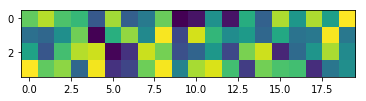

In [7]:
m = 4
n = 20
arr = []
for i in range(m):
    arr.append(create_arr(n)[0])
arr = np.asmatrix(arr)
plt.imshow(arr)

In [8]:
6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.
Plot the resulting matrix.

SyntaxError: invalid syntax (<ipython-input-8-48878c571d19>, line 1)

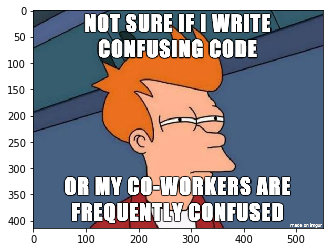

In [24]:
mem = plt.imread('./mem.png')
plt.imshow(mem)

In [25]:
print(mem.shape)
print(mem)

(414, 552, 4)
[[[0.18431373 0.2509804  0.29411766 1.        ]
  [0.18431373 0.2509804  0.29411766 1.        ]
  [0.18431373 0.2509804  0.29411766 1.        ]
  ...
  [0.19607843 0.3647059  0.42745098 1.        ]
  [0.2        0.36862746 0.43137255 1.        ]
  [0.20392157 0.37254903 0.43529412 1.        ]]

 [[0.18431373 0.2509804  0.29411766 1.        ]
  [0.18431373 0.2509804  0.29411766 1.        ]
  [0.18431373 0.2509804  0.29411766 1.        ]
  ...
  [0.19607843 0.36078432 0.42352942 1.        ]
  [0.19607843 0.36078432 0.42352942 1.        ]
  [0.19215687 0.35686275 0.41960785 1.        ]]

 [[0.18431373 0.2509804  0.29411766 1.        ]
  [0.18431373 0.2509804  0.29411766 1.        ]
  [0.18431373 0.2509804  0.29411766 1.        ]
  ...
  [0.20392157 0.36078432 0.42352942 1.        ]
  [0.19607843 0.3529412  0.41568628 1.        ]
  [0.19215687 0.34901962 0.4117647  1.        ]]

 ...

 [[0.2784314  0.38039216 0.5137255  1.        ]
  [0.2784314  0.38039216 0.5137255  1.      

In [26]:
mem = np.reshape(mem, (mem.shape[0]*mem.shape[1], mem.shape[2]))
mem * arr

matrix([[1.38854235, 1.0721151 , 1.2801888 , ..., 0.54302866, 0.9938639 ,
         0.9100343 ],
        [1.38854235, 1.0721151 , 1.2801888 , ..., 0.54302866, 0.9938639 ,
         0.9100343 ],
        [1.38854235, 1.0721151 , 1.2801888 , ..., 0.54302866, 0.9938639 ,
         0.9100343 ],
        ...,
        [1.63272386, 1.25602557, 1.56359821, ..., 0.79004026, 1.36373448,
         1.15856113],
        [1.63272386, 1.25602557, 1.56359821, ..., 0.79004026, 1.36373448,
         1.15856113],
        [1.63272386, 1.25602557, 1.56359821, ..., 0.79004026, 1.36373448,
         1.15856113]])

# Part II

In [73]:
mem = plt.imread('./mem1.png')
shapeOriginal = mem.shape
print(shapeOriginal)
vector = np.reshape(mem, (shapeOriginal[0]*shapeOriginal[1], shapeOriginal[2]))

(480, 500, 3)


NORMAL (NO FILTER)

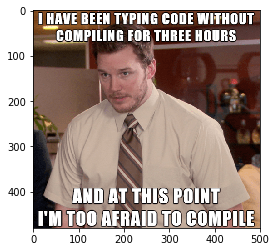

In [74]:
plt.imshow(mem)

AMARO

Just try to add brightness

In [75]:
brightness = [[1.2, 1.2, 1.2]]

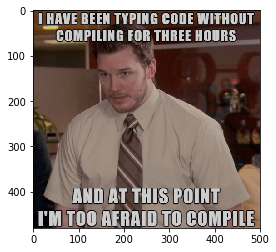

In [76]:
filteredVector = brightness * vector
brightPhoto = np.reshape(filteredVector, (shapeOriginal[0], shapeOriginal[1], shapeOriginal[2]))
plt.imshow(filteredPhoto)

In [77]:
brightness = [[0.8, 0.8, 0.8]]

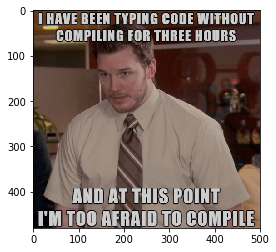

In [78]:
filteredVector = brightness * vector
darkPhoto = np.reshape(filteredVector, (shapeOriginal[0], shapeOriginal[1], shapeOriginal[2]))
plt.imshow(filteredPhoto)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


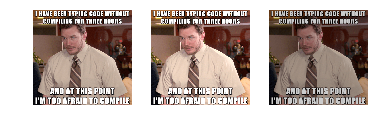

In [79]:
plt.subplot(1, 3, 1)
plt.imshow(mem)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(brightPhoto)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(darkPhoto)
plt.axis('off')
plt.show()